# Regression mittels Künstlicher Neuronaler Netze und Keras

LV Elektronische Steuerungs- und Regelungssysteme SS2020 (Master ETuIT, HSM, (c) Christoph Menz) 

Künstliche Neuronale Netze (KNN) sind in der Lage, nichtlineare Funktionen beliebig genau zu approximieren. Im folgenden wird dies anhand einer Beispielfunktion gezeigt. Gleichzeitig dient dieses Notebook als Einführung in die Modellierung von KNN mittels Tensorflow/Keras sowie Python.

## Funktionsapproximation 

Aufgabe ist es, eine Funktion

$
    f(u):= y = \sin(2 \pi u)u \hspace{2em},u \in[-1,1]
$


mittels eines KNN zu approximieren. Dabei liegen (ggf. verrauschte) Messdaten vor und die Funktion wird als unbekannt angenommen.


**Aufgabe 1.a: Erzeugen Sie für die gegebene Modellfunktion simulierte Messdaten im gegebenen Definitionsbereich**

Es sollen $N=200$ Datenpaare $u_n,y_n$ erzeugt werden. Nutzen Sie dafür die Python-Bibiotheken Numpy (numerische Berechnungen) und Matplotlib (Visualsierung).

https://docs.scipy.org/doc/numpy/reference/index.html

https://matplotlib.org/index.html

**Lösung 1.a:**

Importieren der notwendigen Bibliotheken:

In [1]:
import matplotlib.pyplot as plt
#plt.style.use('dark_background')
import numpy as np

Definition der zu approximierenden Funktion (mit additivem Messrauschen):

In [2]:
def f(u,w):
    y = np.sin(2*np.pi*u)*u  + np.random.randn(len(u))*w
    return y

Erzeugen der Datenpaare (äquidistant, kann ggf. auch zufällig erfolgen):


In [3]:
N = 200 # 50xTraining, 50xValidierung, 100x Test
u = np.linspace(-1,1,N)
y = f(u,0.02)

Visualisierung:

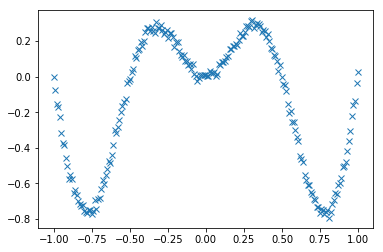

In [4]:
plt.plot(u,y,'x')
plt.show()

**Aufgabe 1.b: Unterteilen Sie erzeugten Datensatz in Lern- und Testdaten**

Der Lerndatensatz soll aus Datenpaaren bestehen und gemischt werden.

**Lösung 1.b**

In [5]:
n_tr = int(N/2)
#Wir mischen unseren Datensatz und...
_shuffled = np.random.permutation(N)
#... ordnen die ersten n_tr zufälligen Indizes den Trainingsdaten...
u_tr = u[_shuffled[:n_tr]]
y_tr = y[_shuffled[:n_tr]]
#und den Rest den Testdaten zu.
u_ts = np.delete(u,_shuffled[:n_tr])
y_ts = np.delete(y,_shuffled[:n_tr])

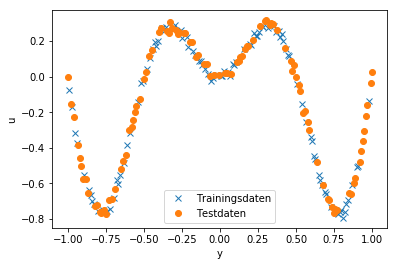

In [6]:
plt.plot(u_tr,y_tr,'x')
#originales Modell als Referenz
plt.plot(u_ts,y_ts,'o')
plt.ylabel('u')
plt.xlabel('y')
plt.legend(['Trainingsdaten', 'Testdaten'], loc='lower center')
plt.show()

**Aufgabe 1.c: Erzeugen sie ein zweischichtiges FF-Netz mit Keras**

Das Netz hat einen Eingang und einen Ausgang. Das Ausgangsneuron soll eine lineare Aktivierungsfunktion haben, die Neurone der Hidden-Layer einen $\tanh$.

**Lösung 1.c:**

Import der notwendigen Keras-Komponenten (Sequentielle API und Dense-Layer, ggf. erscheint Warnung beim ersten import - kann ignoriert werden):

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import Callback

Erstellen des NN-Modells

In [10]:
nh1 = 20
nh2 = 10
#sequentielles KNN-Modell
model = Sequential()
#erste verdeckte Schicht mit nh1 Neuronen und Eingangsdimension 1
model.add(Dense(nh1, input_dim=1, activation='tanh')) #
#zweite verdeckte Schicht mit nh2
model.add(Dense(nh2, activation='tanh')) #
#(lineare) Ausgang
model.add(Dense(1))

Kompileren des Modells ('mse' als loss-Funktion, 'rmsprop' als Lernalgorithmus):

In [11]:
#Kompilieren mit mean squared error als Optimierungskriterium
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mse'])


**Aufgabe 1.d: Belehren des Netzes und Visualisierung der Ergebnisse**

Nutzen sie den Rückgabewert der Lernfunktion ('fit') zur Visualisierung des Lernfortschritts! Wählen Sie zunächst eine kleinere Anzahl an Lernepochen und wiederholen Sie ggf. die Belehrung.

**Lösung 1.d:**

In [13]:
#Den Rückgabewert der fit-Funktion nutzen wir später noch...
history = model.fit(u_tr, y_tr, 
                    epochs = 1000, #Anzahl Lernepochen
                    batch_size=np.alen(u_tr), #Die Batchgröße
                    validation_split=0.5,
                    verbose = 1, #wir sparen uns hier den Konsolen-Output
                    )

plt.clf()
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.ylabel('MSE')
plt.xlabel('Epoche')
plt.legend(['Training', 'Validierung'], loc='upper right')
plt.show()

Epoch 1/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0561 - val_mse: 0.0561
Epoch 2/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0539 - val_mse: 0.0539
Epoch 3/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0551 - val_mse: 0.0551
Epoch 4/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0546 - val_mse: 0.0546
Epoch 5/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0544 - val_mse: 0.0544
Epoch 6/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0553 - val_mse: 0.0553
Epoch 7/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0534 - val_mse: 0.0534
Epoch 8/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.0456 - m

KeyError: 'mean_squared_error'

<Figure size 432x288 with 0 Axes>

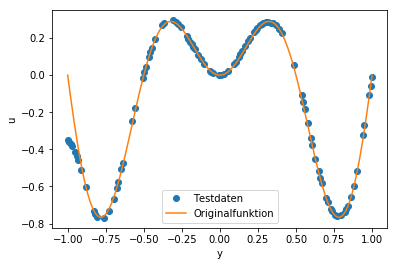

In [21]:
y_pred = model.predict(u_ts, 1)
plt.plot(u_ts,y_pred,'o')
#originales Modell als Referenz
plt.plot(u,f(u,0.0),'-')
plt.ylabel('u')
plt.xlabel('y')
plt.legend(['Testdaten', 'Originalfunktion'], loc='lower center')
plt.show()